# jet systematics

Given the analysis requires at least two jets and is binned in the number of b tags, the effect of uncertainties of the jets on the branching fractions should be considered.  The main sources to consider are:

   * jet energy scale
   * jet energy resolution
   * b tag efficiency scale factor
   * mistag efficiency scale factors
   
The first two uncertainty sources affect the overall number of events that are accepted, whereas all of these will cause migration between b tag multiplicity bins.  This is obviously the case for the efficiency scale factors; the jet energy uncertainty impacts the b tag multiplicity due to the pt dependence of the scale factors.

In [2]:
# imports and configuration
%cd /home/naodell/work/wbr/analysis

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('default')

import scripts.plot_tools as pt
import scripts.systematic_tools as st

pt.set_default_style()

/home/naodell/work/wbr/analysis


In [36]:
# Get the data (unbinned)
### get the data and prepare labels

selection = 'mumu'
dm = pt.DataManager(input_dir     = f'local_data/flatuples/single_lepton_new/{selection}_2016',
                    dataset_names = ['ttbar_inclusive'],
                    selection     = selection,
                    period        = 2016,
                    scale         = 35.9e3,
                    cuts          = pt.cuts[selection]
                   )

df = dm.get_dataframe('ttbar')

Loading dataframes: 100%|███████████████| 1.00/1.00 [00:04<00:00, 4.14s/it]


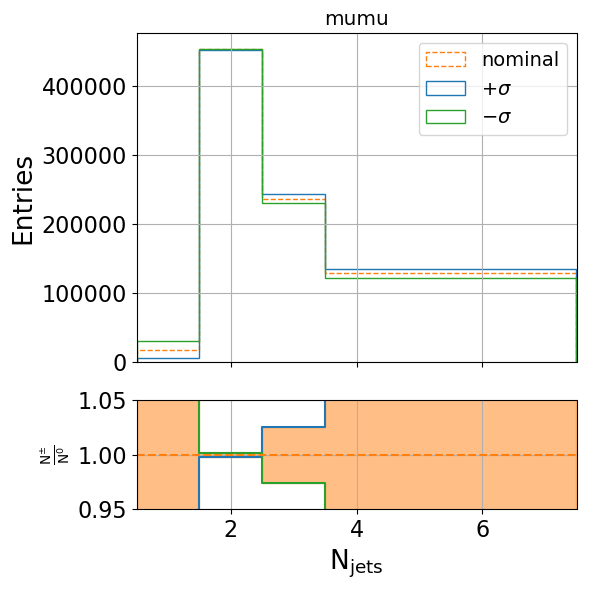

In [37]:
# make plots of the b tag multiplicity for each 
fig, axes = plt.subplots(2, 1, figsize=(6, 6), facecolor='white', sharex='col', gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0)

if selection in ['ee', 'emu', 'mumu']:
    bins = [0.5, 1.5, 2.5, 3.5, 7.5]
elif selection in ['etau', 'mutau']:
    bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 7.5]
elif selection in ['e4j', 'mu4j']:
    bins = [2.5, 3.5, 4.5, 5.5, 7.5]
brange = (bins[0], bins[-1])

# JES
ax = axes[0]
h_nominal, b, _ = ax.hist(df.n_jets, bins=bins, color='C1', linestyle='--', histtype='step')
h_plus, _, _ = ax.hist(df.n_jets_jes_up, bins=bins, color='C0', histtype='step')
h_minus, _, _ = ax.hist(df.n_jets_jes_down, bins=bins, color='C2', histtype='step')
#ax.fill_between(bins, h_plus[-1], h_minus[-1], color = 'C1', alpha=0.5, step='post')
ax.legend(['nominal', r'$+\sigma$', r'$-\sigma$'], fontsize=14)
ax.set_ylabel('Entries')
ax.set_title(f'{selection}')
ax.grid()
ax.set_yscale('linear')

ax = axes[1]
x = bins
y_up = h_plus/h_nominal
y_down = h_minus/h_nominal
y_up = np.append(y_up, y_up[-1])
y_down = np.append(y_down, y_down[-1])
ax.plot(x, y_up, 'C0', drawstyle='steps-post')
ax.plot(x, y_down, 'C2', drawstyle='steps-post')
ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5, step='post')
ax.plot(brange, [1, 1], 'C1--')

ax.set_xlim(brange)
ax.set_ylim(0.95, 1.05)
ax.set_xlabel(r'$\sf N_{jets}$')
ax.set_ylabel(r'$\sf \frac{N^{\pm}}{N^{0}}$', fontsize=14)
ax.grid()

plt.savefig(f'plots/systematics/{selection}_njets_jes.pdf')
plt.tight_layout()
plt.show()

In [ ]:
# make plots of the b tag multiplicity for each of the 4 variations
df = dm.get_dataframe('ttbar')

fig, axes = plt.subplots(2, 1, figsize=(6, 6), facecolor='white', sharex='col', gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0)

bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 7.5]
brange = (bins[0], bins[-1])

# JES
ax = axes[0]
h_nominal, b, _ = ax.hist(df.query('n_jets >= 0').n_jets, bins=bins, color='C1', linestyle='--', histtype='step')
h_plus, _, _ = ax.hist(df.query('n_jets_jes_up >= 0').n_jets_jes_up, bins=bins, color='C0', histtype='step')
h_minus, _, _ = ax.hist(df.query('n_jets_jes_down >= 0').n_jets_jes_down, bins=bins, color='C2', histtype='step')
#ax.fill_between(bins, h_plus[-1], h_minus[-1], color = 'C1', alpha=0.5, step='post')
ax.legend(['nominal', r'$+\sigma$', r'$-\sigma$'], fontsize=14)
ax.set_ylabel('Entries')
ax.set_title(f'{selection}')
ax.grid()
ax.set_yscale('linear')

ax = axes[1]
x = bins
y_up = h_plus/h_nominal
y_down = h_minus/h_nominal
y_up = np.append(y_up, y_up[-1])
y_down = np.append(y_down, y_down[-1])
ax.plot(x, y_up, 'C0', drawstyle='steps-post')
ax.plot(x, y_down, 'C2', drawstyle='steps-post')
ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5, step='post')
ax.plot(brange, [1, 1], 'C1--')

ax.set_xlim(brange)
ax.set_ylim(0.8, 1.2)
ax.set_xlabel(r'$\sf N_{b\ jets}$')
ax.set_ylabel(r'$\sf \frac{N^{\pm}}{N^{0}}$', fontsize=14)
ax.grid()

plt.savefig(f'plots/systematics/{selection}_jes.pdf')
plt.tight_layout()
plt.show()

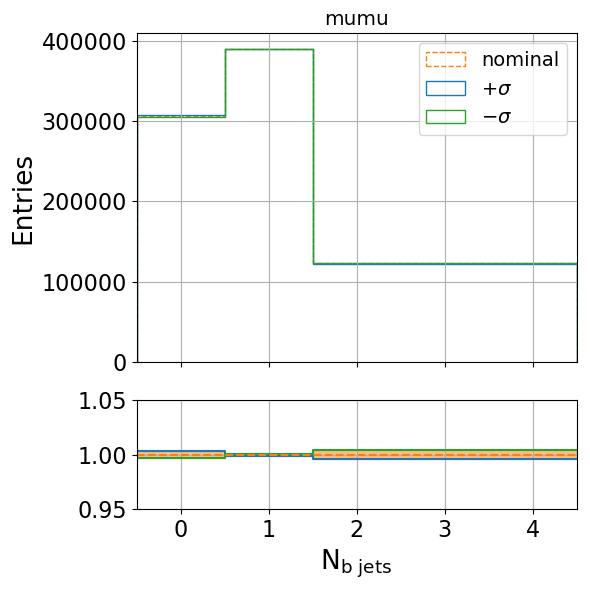

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6), facecolor='white', sharex='col', gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0)

# JER
ax = axes[0]
h_nominal, b, _ = ax.hist(df.query('n_jets >= 2').n_bjets, bins=bins, color='C1', linestyle='--', histtype='step')
h_plus, _, _ = ax.hist(df.query('n_jets_jer_up >= 2').n_bjets_jer_up, bins=bins, color='C0', histtype='step')
h_minus, _, _ = ax.hist(df.query('n_jets_jer_down >= 2').n_bjets_jer_down, bins=bins, color='C2', histtype='step')
ax.legend(['nominal', r'$+\sigma$', r'$-\sigma$'], fontsize=14)
ax.set_ylabel('Entries')
ax.set_title(f'{selection}')
ax.grid()
ax.set_yscale('linear')

ax = axes[1]
x = bins
y_up = h_plus/h_nominal
y_down = h_minus/h_nominal
y_up = np.append(y_up, y_up[-1])
y_down = np.append(y_down, y_down[-1])
ax.plot(x, y_up, 'C0', drawstyle='steps-post')
ax.plot(x, y_down, 'C2', drawstyle='steps-post')
ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5, step='post')
ax.plot(brange, [1, 1], 'C1--')

ax.set_xlim(brange)
ax.set_ylim(0.95, 1.05)
ax.set_xlabel(r'$\sf N_{ b\ jets}$')
ax.grid()

plt.savefig(f'plots/systematics/{selection}_jer.pdf')
plt.tight_layout()
plt.show()

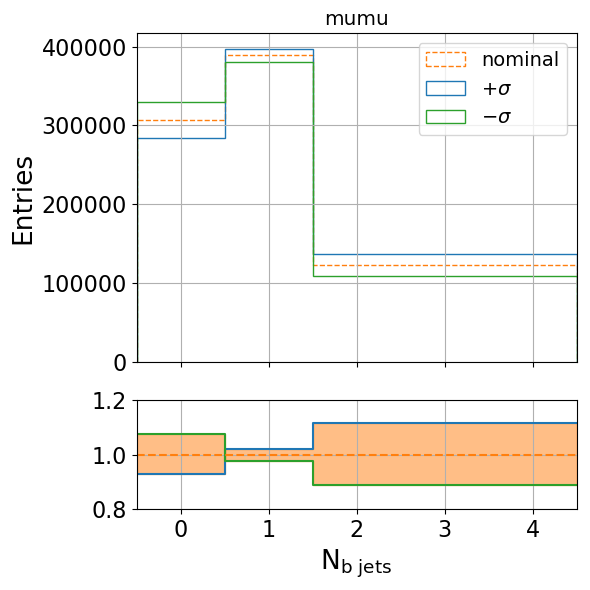

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6), facecolor='white', sharex='col', gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0)

# b tag eff
ax = axes[0]
h_nominal, b, _ = ax.hist(df.query('n_jets >= 2').n_bjets, bins=bins, color='C1', linestyle='--', histtype='step')
h_plus, _, _ = ax.hist(df.query('n_jets >= 2').n_bjets_btag_up, bins=bins, color='C0', histtype='step')
h_minus, _, _ = ax.hist(df.query('n_jets >= 2').n_bjets_btag_down, bins=bins, color='C2', histtype='step')
ax.legend(['nominal', r'$+\sigma$', r'$-\sigma$'], fontsize=14)
ax.set_ylabel('Entries')
ax.set_title(f'{selection}')
ax.grid()
ax.set_yscale('linear')

ax = axes[1]
x = bins
y_up = h_plus/h_nominal
y_down = h_minus/h_nominal
y_up = np.append(y_up, y_up[-1])
y_down = np.append(y_down, y_down[-1])
ax.plot(x, y_up, 'C0', drawstyle='steps-post')
ax.plot(x, y_down, 'C2', drawstyle='steps-post')
ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5, step='post')
ax.plot(brange, [1, 1], 'C1--')

ax.set_xlim(brange)
ax.set_ylim(0.8, 1.2)
ax.set_xlabel(r'$\sf N_{b\ jets}$')
ax.grid()

plt.savefig(f'plots/systematics/{selection}_btag.pdf')
plt.tight_layout()
plt.show()
 

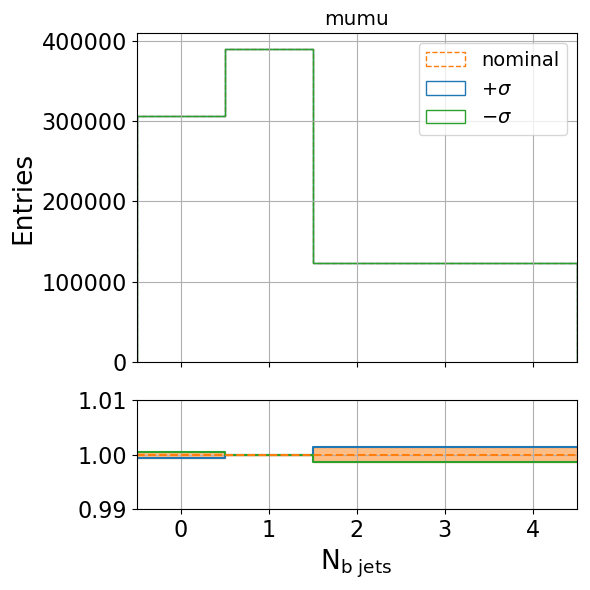

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6), facecolor='white', sharex='col', gridspec_kw={'height_ratios':[3,1]})
fig.subplots_adjust(hspace=0)

## mistag eff
ax = axes[0]
h_nominal, b, _ = ax.hist(df.query('n_jets >= 2').n_bjets, bins=bins, color='C1', linestyle='--', histtype='step')
h_plus, _, _ = ax.hist(df.query('n_jets >= 2').n_bjets_mistag_up, bins=bins, color='C0', histtype='step')
h_minus, _, _ = ax.hist(df.query('n_jets >= 2').n_bjets_mistag_down, bins=bins, color='C2', histtype='step')
ax.legend(['nominal', r'$+\sigma$', r'$-\sigma$'], fontsize=14)
ax.set_ylabel('Entries')
ax.set_title(f'{selection}')
ax.grid()
ax.set_yscale('linear')

ax = axes[1]
x = bins
y_up = h_plus/h_nominal
y_down = h_minus/h_nominal
y_up = np.append(y_up, y_up[-1])
y_down = np.append(y_down, y_down[-1])
ax.plot(x, y_up, 'C0', drawstyle='steps-post')
ax.plot(x, y_down, 'C2', drawstyle='steps-post')
ax.fill_between(x, y_up, y_down, color = 'C1', alpha=0.5, step='post')
ax.plot(brange, [1, 1], 'C1--')

ax.set_xlim(brange)
ax.set_ylim(0.99, 1.01)
ax.set_xlabel(r'$\sf N_{b\ jets}$')
ax.grid()

plt.savefig(f'plots/systematics/{selection}_mistag.pdf')
plt.tight_layout()
plt.show()

In [15]:
columns = ['nominal', 'jes_up', 'jes_down', 'jer_up', 'jer_down', 'b_tag_up', 'b_tag_down', 'mistag_up', 'mistag_down']
